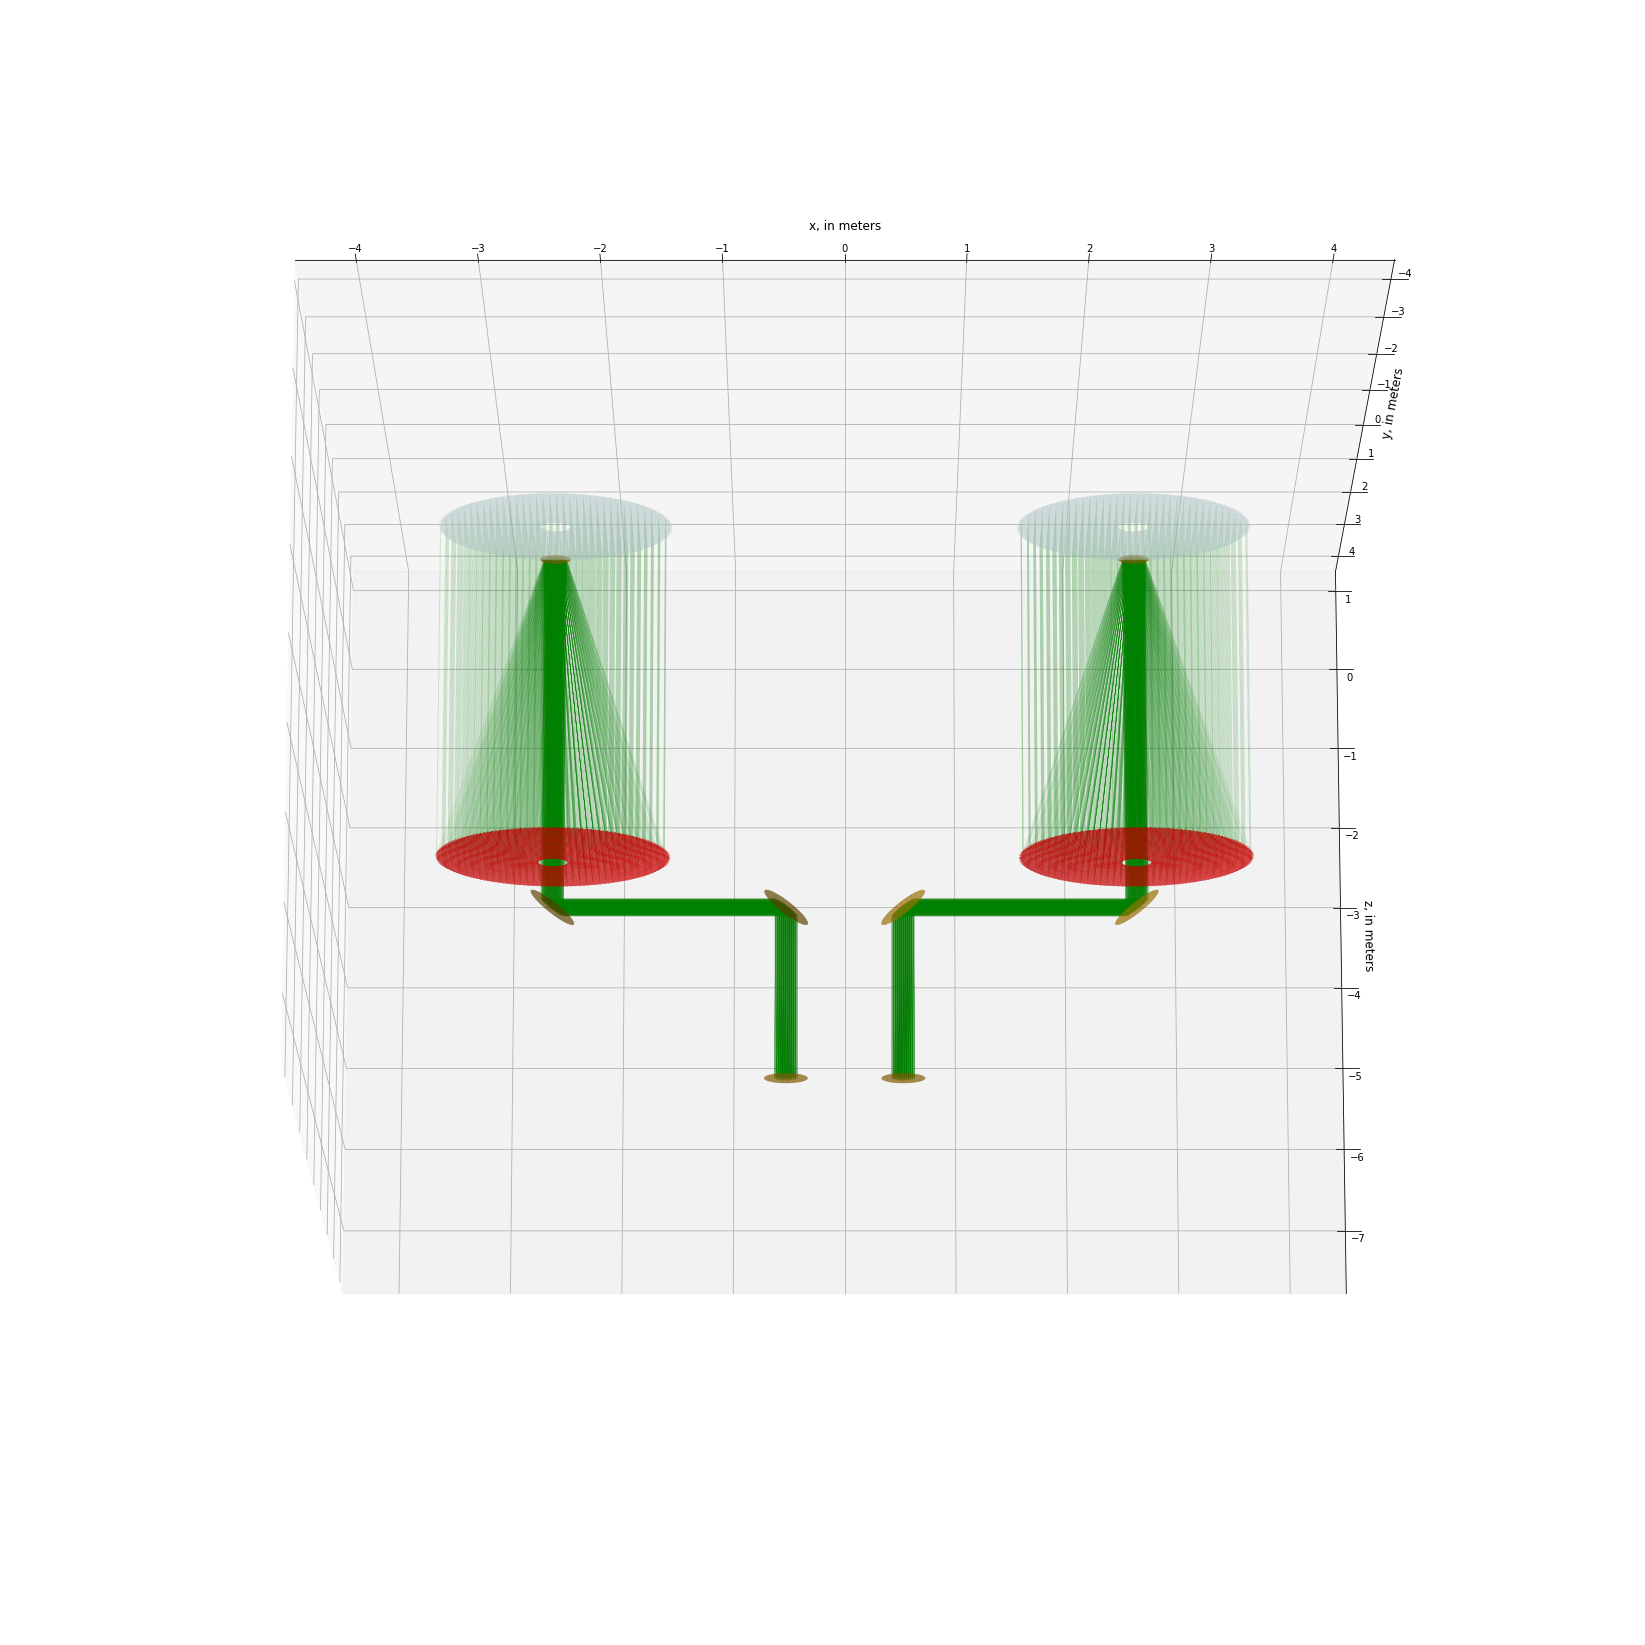

In [540]:
import pimms.optics as op
import copy
reload(op)
assembly=op.PhotonCollector(fov=np.deg2rad(5./60.))
m3=copy.deepcopy(assembly.parts[-1])
m3.boundary=(0,1)
m3.p[0]=2.
d1=op.Detector(m3.d_out/2., 128, p=np.copy(m3.p))
d1.p[2]=d1.p[2]-2
assembly.add_part(m3)
assembly.add_part(d1)
new_assembly=copy.deepcopy(assembly)
assembly.move([-2.5,0,0])
new_assembly.rotate(op.quat.from_angles(np.pi, 0.))
new_assembly.move([+2.5,0,0])
assembly.join(new_assembly)
del new_assembly
s=op.LightSource((np.pi,np.deg2rad(.03/3600.),np.inf))
p,q=s(assembly.get_entrance(), 1000, 1, sampling='dizzle')
trace,seq=assembly.trace(q,steps=6)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=assembly.draw(nside=64,axes=ax,draw_virtual=True,raytrace=trace,view_angles=(-15, -90))

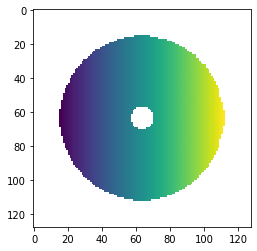

In [541]:
dets=assembly.get_detectors()
dets[0].photon_buffer=np.empty((0,),dtype=op.sptype)
for i in range(4):
    p,q=s(assembly.get_entrance(), 10000, 1., sampling='dizzle')
    trace,seq=assembly.trace(q,steps=6)
plt.imshow(dets[0].readout(clear_buffer=False)[1])

In [384]:
q.size

19831

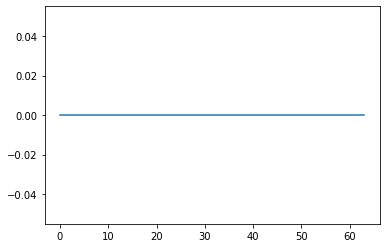

In [170]:
plt.plot(dets[0].readout(clear_buffer=False)[0][32,:])

In [139]:
dets[0].readout(clear_buffer=False)[0].sum()

860254.9581251761

In [141]:
dets[0].photon_buffer['weight'].size

3110719

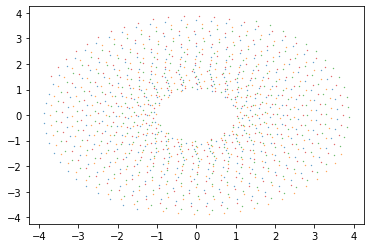

In [158]:
rho0=np.arange(1,4,0.01)
dphi0=np.pi*(16-1)/4/300/0.1/rho0
phi0=np.cumsum(dphi0)
x0=rho0*np.cos(phi0)
y0=rho0*np.sin(phi0)
phi1=np.cumsum(dphi0)+np.pi/2.
x1=rho0*np.cos(phi1)
y1=rho0*np.sin(phi1)
phi2=np.cumsum(dphi0)+np.pi
x2=rho0*np.cos(phi2)
y2=rho0*np.sin(phi2)
phi3=np.cumsum(dphi0)+3.*np.pi/2.
x3=rho0*np.cos(phi3)
y3=rho0*np.sin(phi3)
plt.scatter(x0,y0,s=.1)
plt.scatter(x1,y1,s=.1)
plt.scatter(x2,y2,s=.1)
plt.scatter(x3,y3,s=.1)

In [147]:
np.cumsum(np.arange(4))

array([0, 1, 3, 6])

In [353]:
op.quat.rotate(op.quat.from_angles(0., np.pi/4.), [1,0,0])

array([0.70710678, 0.        , 0.70710678])

In [368]:
assembly.parts[3].normal([0,0,0])

array([[0.70710678],
       [0.        ],
       [0.70710678]])

In [372]:
assembly.get_entrance()

In [417]:
op.quat.from_angles(np.pi, 0.)

array([ 6.123234e-17,  0.000000e+00, -0.000000e+00,  1.000000e+00])

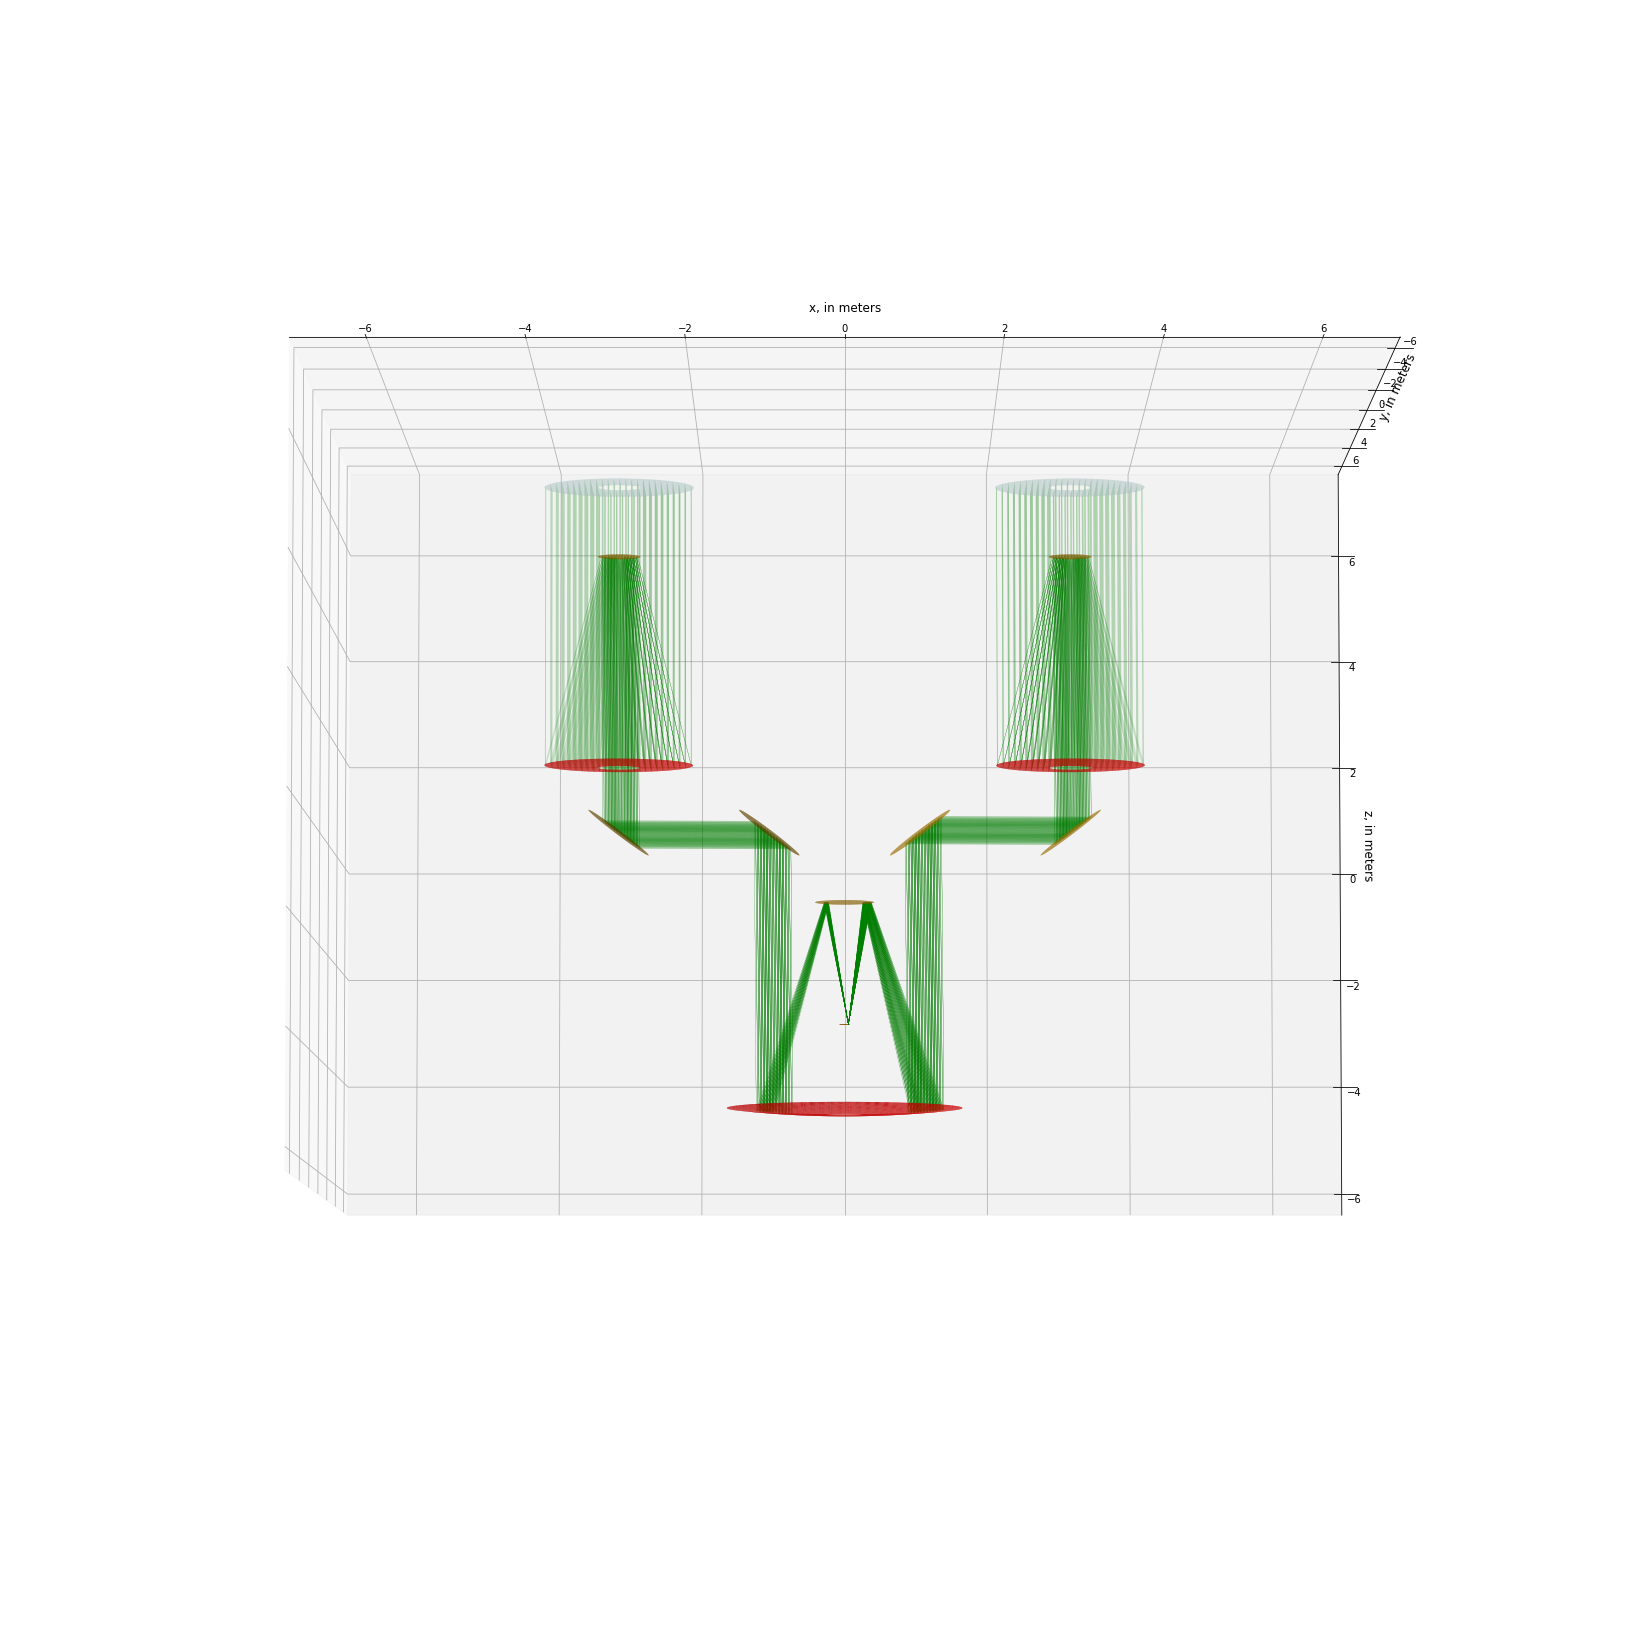

In [535]:
reload(op)
sim=op.SIM(init_b=6., collector_r=4., detector_a=.1, optics_fov=np.deg2rad(10./60.), detector_fov=np.deg2rad(10./60.))
s=op.LightSource((np.pi,np.deg2rad(4.9/60.),np.inf))
p,q=s(sim.get_entrance(), 500, 1, sampling='dizzle')
trace,seq=sim.trace(q,steps=10)
fig=plt.figure(figsize=(30,30))
ax=fig.add_subplot(111,projection='3d')
trigs,zs,extent=sim.draw(axes=ax,draw_virtual=True,raytrace=trace,view_angles=(-5, -90))

In [520]:
det=sim.get_detectors()[0]

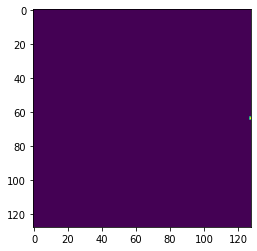

In [521]:
plt.imshow(det.readout(clear_buffer=False)[0])

In [493]:
sim.parts[3].intersect(trace[-5,:])

(array([[-0.25516831, -0.25315197, -0.25113577, ...,  0.24999546,
          0.24797947,  0.24596362],
        [-0.02426972, -0.02426914, -0.02426857, ..., -0.02449263,
         -0.02449206, -0.0244915 ],
        [-1.23878829, -1.23896294, -1.2391362 , ..., -1.23923172,
         -1.23940281, -1.2395725 ]]),
 array([3.78739899, 3.78681776, 3.78624112, 3.78566905, 3.78510158,
        3.78453868, 3.78911701, 3.78852203, 3.78793163, 3.78734582,
        3.78676459, 3.78618794, 3.78561588, 3.7850484 , 3.78448551,
        3.7839272 , 3.78337347, 3.78282434, 3.789668  , 3.78906844,
        3.78847345, 3.78788306, 3.78729724, 3.78671601, 3.78613936,
        3.7855673 , 3.78499982, 3.78443692, 3.78387861, 3.78332489,
        3.78277575, 3.7822312 , 3.7908369 , 3.79022817, 3.78962402,
        3.78902446, 3.78842947, 3.78783907, 3.78725326, 3.78667203,
        3.78609538, 3.78552331, 3.78495583, 3.78439294, 3.78383463,
        3.7832809 , 3.78273176, 3.78218721, 3.78164724,        inf,
        3.79

In [492]:
trace[-5,-1]

(3.9238255, [ 0.98209117, -0.0978269 , -4.95128634], [-0.19450003,  0.01937672,  0.98071111], 5.e-07, 2.91328426)

In [485]:
sim.parts[3].coef

{'x2': 1.0,
 'y2': 1.0,
 'z2': -0.79667599425632,
 'xy': 0.0,
 'xz': 0.0,
 'yz': 0.0,
 'x': 0.0,
 'y': 0.0,
 'z': -7.8426935613031725,
 'c': -8.558560710603466}

In [491]:
sim.parts[7].coef

{'x2': 1.0,
 'y2': 1.0,
 'z2': 0.0,
 'xy': 0.0,
 'xz': 0.0,
 'yz': 0.0,
 'x': 0.0,
 'y': 0.0,
 'z': -2.0,
 'c': -1.0}

In [544]:
det.p

array([[ 0.        ],
       [ 0.        ],
       [-5.54713498]])

In [543]:
trace[-1,:]['position']

array([[-2.67294788e+00, -9.85536047e-01, -1.00000000e-05],
       [-5.15507309e-01, -9.85536047e-02, -6.52799083e+00],
       [-5.13732249e-01, -9.85536047e-02, -6.52799083e+00],
       ...,
       [ 4.88738825e-01, -9.90947780e-02, -6.52799083e+00],
       [ 4.86963765e-01, -9.90947780e-02, -6.52799083e+00],
       [ 2.35176285e+00, -9.90947780e-01, -1.00000000e-05]])